Вариант 3.
Уравнение -$\dfrac{1}{x-3}u''+(1+\dfrac{x}{2})u'-e^{\frac{x}{2}}u=2-x\\$
$u(-1)=u(1)=0\quad \alpha_1=1,\alpha_2=0,\alpha=0,\quad \beta_1=1,\beta_2=0,\beta=0$

In [38]:


import numpy as np
import scipy
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from typing import Callable, List, Tuple, Any, Dict

# Параметры подобраны так, чтобы в МОЕМ!!! VSCode смотрелось хорошо.
plt.rcParams.update(
    {
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "lightgray",
        "axes.facecolor": "#151515",
        "axes.edgecolor": "#A2A2A2",
        "axes.labelcolor": "white",
        "axes.prop_cycle": plt.cycler('color', ['#00BBF9', '#FEE440', '#00F5D4', '#F15BB5', '#9B5DE5', '#1f77b4', '#ff7f0e', '#2ca02c',
            '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "#A2A2A2",
        "figure.facecolor": "#151515",
        "figure.edgecolor": "#A2A2A2",
        "savefig.facecolor": "#FFFFFF",
        "savefig.edgecolor": "black"
    }
)



In [2]:
def p(x):
    return  1/(x-3)
def q(x):
    return 1+x/2
def r(x):
    return -np.exp(x/2)
def f(x):
    return 2-x

In [3]:
def fun (x,y):
    return np.vstack([y[1],(q(x)*y[1]+r(x)*y[0]-f(x))/(p(x))])  
def bc (ya, yb):
    return np.array([ya[0],yb[0]]) 

In [4]:
x = np.linspace(-1,1,11)
y = np.zeros((2,x.size))
res = scipy.integrate.solve_bvp(fun,bc,x,y)

In [5]:
x

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [6]:
def oh( n, a, b, p, q, r, f):
    x = np.linspace(a, b, n+1)
    h = (b-a)/(n)
    A = np.array([0])
    B = np.array([h])
    C = np.array([0])
    G = np.array([0])
    y = np.zeros(n+1)
    s = np.array([C[0]/B[0]])
    t = np.array([-G[0]/B[0]])
    for i in range (1, n+1):
        if (i != n):
            A=np.append(A,-p(x[i])-q(x[i])*h/2)
            C=np.append(C,-p(x[i]) + q(x[i])*h/2)
            B=np.append(B,A[i] + C[i] - h**2*r(x[i]))
            G = np.append (G, h**2*f(x[i]))
        else:
            A = np.append (A, 0)
            B = np.append (B, h)
            C = np.append (C, 0)
            G = np.append (G, 0)
        
        s=np.append(s,C[i]/(B[i]-A[i]*s[i-1]))
        t=np.append(t,(A[i]*t[i-1]-G[i])/(B[i]-A[i]*s[i-1]))
    y[n] = t[n]
    for i in range(n-1,-1,-1):
        y[i] = s[i]*y[i+1]+t[i]
    data = {"x_i":x, "A_i":A, "B_i":B, "C_i":C, "G_i":G, "s_i":s, "t_i":t, "y_i":y}
    return y, data


In [7]:
oh_result, data =oh(10,-1,1,p,q,r,f)

In [8]:
oh_result

array([ 0.        , -0.93673061, -1.25676176, -1.2560045 , -1.10891451,
       -0.90868586, -0.70013375, -0.50192571, -0.31975378, -0.15336771,
       -0.        ])

In [9]:
res.sol(x)[0]

array([-5.07285455e-21, -9.19286060e-01, -1.23853414e+00, -1.24272958e+00,
       -1.10105956e+00, -9.04868015e-01, -6.98768918e-01, -5.01793073e-01,
       -3.20072765e-01, -1.53669147e-01,  7.80625564e-18])

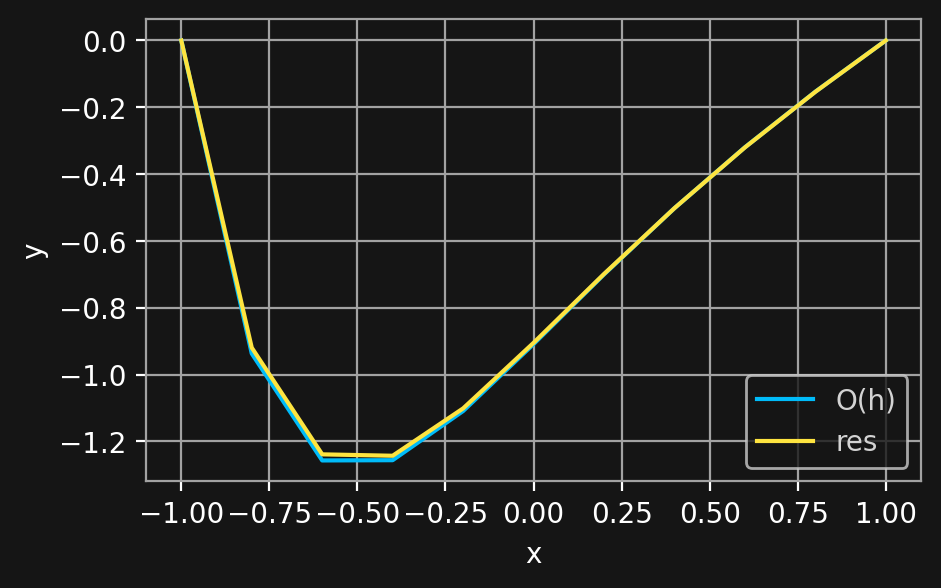

In [10]:
fig, ax = plt.subplots(figsize=(5,3),dpi = 200)
ax.plot(x, oh_result, label=r'O(h)')
ax.plot(x, res.sol(x)[0], label='res')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

In [11]:
frame = pd.DataFrame(data)

In [12]:
frame

,x_i,A_i,B_i,C_i,G_i,s_i,t_i,y_i
0,-1.0,0.000000,0.200000,0.000000,0.000,0.000000,0.000000,0.000000
1,-0.8,0.203158,0.553129,0.323158,0.112,0.584236,-0.202485,-0.936731
2,-0.6,0.207778,0.585188,0.347778,0.104,0.749849,-0.314948,-1.256762
3,-0.4,0.214118,0.620985,0.374118,0.096,0.812542,-0.354965,-1.256005
4,-0.2,0.222500,0.661193,0.402500,0.088,0.837838,-0.347583,-1.108915
5,0.0,0.233333,0.706667,0.433333,0.080,0.847727,-0.315164,-0.908686
6,0.2,0.247143,0.758493,0.467143,0.072,0.850924,-0.273033,-0.700134
7,0.4,0.264615,0.818087,0.504615,0.064,0.851069,-0.229793,-0.501926
8,0.6,0.286667,0.887328,0.546667,0.056,0.849713,-0.189435,-0.319754
9,0.8,0.314545,0.968764,0.594545,0.048,0.847546,-0.153368,-0.153368


In [13]:
x

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [14]:
def richardson(a,b,n,s=1):

    y = oh(n,a,b,p,q,r,f)[0]
    y_2 = oh(2*n, a, b, p, q, r, f)[0]
    y_clar=np.array([(2*y_2[2*i] - y[i]) for i in range (n+1)])
    return y_clar

In [15]:
oh_result_2 = oh(20,-1 ,1,p, q, r, f)[0]
richardson_ans = richardson(-1, 1, 20)

In [48]:
oh_result_2.shape

(21,)

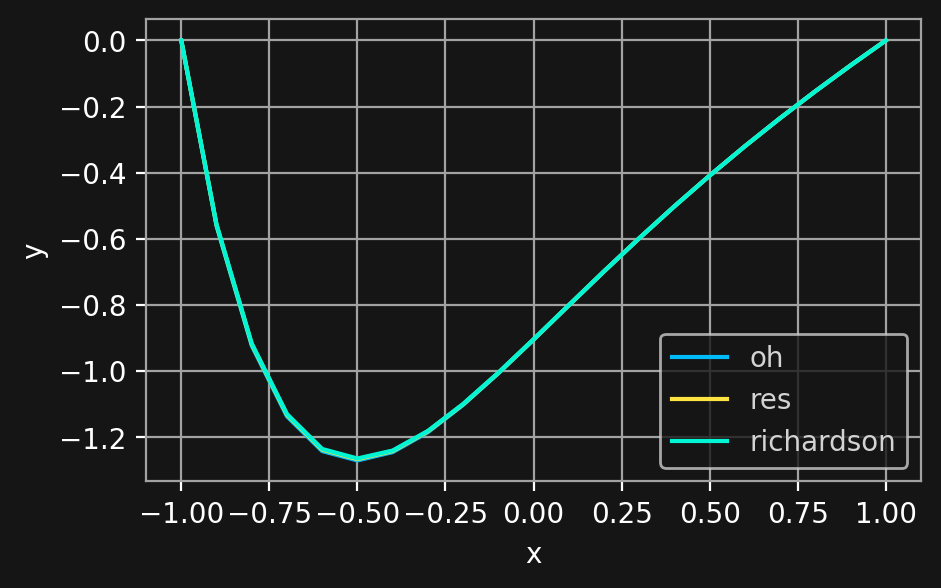

In [16]:
x_richardson = np.linspace(-1, 1, 21)
fig, ax = plt.subplots(figsize=(5,3),dpi = 200)
ax.plot(x_richardson, oh_result_2, label='oh')
ax.plot(x_richardson, res.sol(x_richardson)[0], label='res')
ax.plot(x_richardson, richardson_ans, label='richardson')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

In [72]:
def oh_2( n, a, b, p, q, r, f):
     h = (b-a)/(n)
     #x = np.linspace(a-h/2, b-h/2, 2*n+1)
     x = np.linspace(a-h/2, b+h/2, 2*n+3)
     #x = np.linspace(a,b, n+1)
     A = np.array([0])
     B = np.array([h])
     C = np.array([-h])
     G = np.array([0])
     y = np.zeros(n+2)
     s = np.array([C[0]/B[0]])
     t = np.array([-G[0]/B[0]])
     for i in range (1, n+2):
          if (i != n+1):
               A=np.append(A,-p(x[2*i])-q(x[2*i+1])*h/2)
               C=np.append(C,-p(x[2*i+2]) + q(x[2*i+1])*h/2)
               B=np.append(B,A[i] + C[i] - h**2*r(x[2*i+1]))
               G = np.append (G, h**2*f(x[2*i+1]))
          else:
               A = np.append (A, -h)
               B = np.append (B, h)
               C = np.append (C, 0)
               G = np.append (G, 0)
          
          s=np.append(s,C[i]/(B[i]-A[i]*s[i-1]))
          t=np.append(t,(A[i]*t[i-1]-G[i])/(B[i]-A[i]*s[i-1]))
     y[n] = t[n]
     y[n+1] = -y[n]
     for i in range(n-1,-1,-1):
          y[i] = s[i]*y[i+1]+t[i]
     data = {"x_i":np.linspace(a-h/2, b+h/2, n+2), "A_i":A, "B_i":B, "C_i":C, "G_i":G, "s_i":s, "t_i":t, "y_i":y}
     return y, data






     


In [73]:
oh_2_result, oh_2_data = oh_2(20,-1 ,1,p, q, r, f)

In [74]:
oh_2_result.shape

(22,)

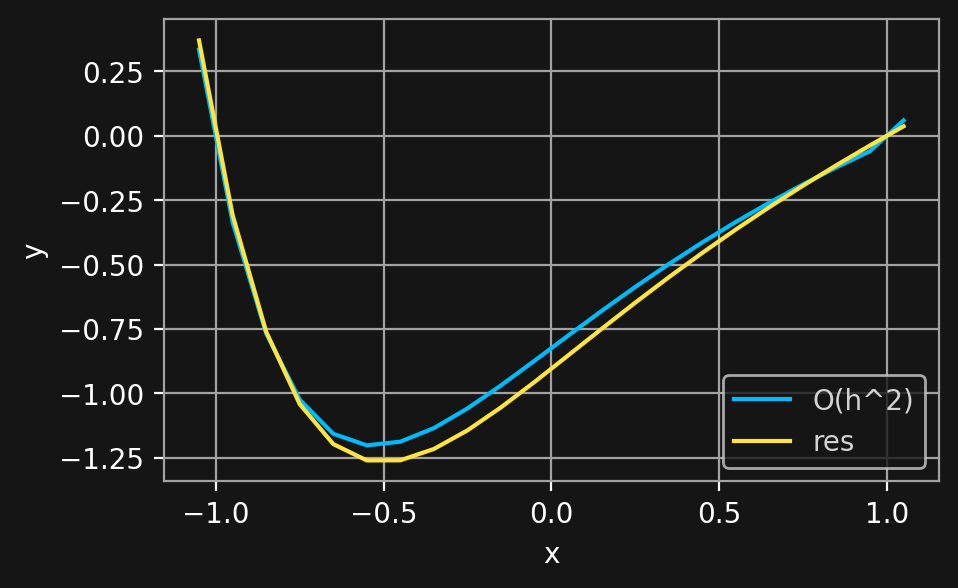

In [75]:
x_oh_2 = np.linspace(-1, 1, 21)
h = (2)/(20)
x = np.linspace(-1-h/2, 1+h/2, 22)
fig, ax = plt.subplots(figsize=(5,3),dpi = 200)
ax.plot(x, oh_2_result, label=r'O(h^2)')
ax.plot(x, res.sol(x)[0], label='res')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

In [76]:
frame_2=pd.DataFrame(oh_2_data)

In [77]:
frame_2

,x_i,A_i,B_i,C_i,G_i,s_i,t_i,y_i
0,-1.05,0.000000,0.100000,-0.100000,0.000,-1.000000,0.000000,0.334709
1,-0.95,0.225665,0.519281,0.287240,0.029,0.385586,-0.038929,-0.334709
2,-0.85,0.229740,0.533110,0.296667,0.028,0.667378,-0.083108,-0.767092
3,-0.75,0.234167,0.547686,0.306473,0.027,0.782999,-0.118702,-1.024882
4,-0.65,0.238973,0.563071,0.316690,0.026,0.842361,-0.144609,-1.157319
5,-0.55,0.244190,0.579333,0.327355,0.025,0.876131,-0.161419,-1.202228
6,-0.45,0.249855,0.596550,0.338507,0.024,0.896367,-0.170349,-1.187961
7,-0.35,0.256007,0.614807,0.350192,0.023,0.908811,-0.172866,-1.135263
8,-0.25,0.262692,0.634201,0.362460,0.022,0.916546,-0.170460,-1.058962
9,-0.15,0.269960,0.654841,0.375369,0.021,0.921353,-0.164496,-0.969403


In [30]:
def create_frame (a, b, n):
    x = np.linspace(a, b, n+1)
    y_ex = res.sol(x)[0]
    y_ut = oh(n, a, b, p ,q, r, f)[0]
    diff = y_ut - y_ex
    y_ut_2 = oh_2(n, a, b, p, q, r, f)[0]
    diff_2 = y_ut_2 - y_ex
    data = {"y_ex ":y_ex ,"y_ut":y_ut, "diff":diff, "y_ut_2":y_ut_2, "diff_2":diff_2 }
    frame = pd.DataFrame(data)
    return frame

In [31]:
create_frame(-1, 1 ,10)

,y_ex,y_ut,diff,y_ut_2,diff_2
0,-5.072855e-21,0.000000,5.072855e-21,0.622627,0.622627
1,-9.192861e-01,-0.936731,-1.744456e-02,-0.622627,0.296659
2,-1.238534e+00,-1.256762,-1.822762e-02,-1.074605,0.163929
3,-1.242730e+00,-1.256005,-1.327492e-02,-1.126223,0.116507
4,-1.101060e+00,-1.108915,-7.854942e-03,-0.999605,0.101455
5,-9.048680e-01,-0.908686,-3.817845e-03,-0.808626,0.096242
6,-6.987689e-01,-0.700134,-1.364827e-03,-0.605933,0.092836
7,-5.017931e-01,-0.501926,-1.326378e-04,-0.412725,0.089068
8,-3.200728e-01,-0.319754,3.189819e-04,-0.235399,0.084673
9,-1.536691e-01,-0.153368,3.014379e-04,-0.073978,0.079691


In [34]:
create_frame(-1, 1 ,20)

,y_ex,y_ut,diff,y_ut_2,diff_2
0,-5.072855e-21,0.000000,5.072855e-21,0.330187,0.330187
1,-5.584254e-01,-0.560870,-2.444671e-03,-0.330187,0.228238
2,-9.192861e-01,-0.923538,-4.252036e-03,-0.755366,0.163920
3,-1.132936e+00,-1.137585,-4.649148e-03,-1.007312,0.125623
4,-1.238534e+00,-1.242980,-4.445901e-03,-1.134880,0.103654
5,-1.267186e+00,-1.271101,-3.915936e-03,-1.175590,0.091596
6,-1.242730e+00,-1.245977,-3.247697e-03,-1.157556,0.085174
7,-1.183007e+00,-1.185569,-2.562254e-03,-1.101342,0.081665
8,-1.101060e+00,-1.102990,-1.930292e-03,-1.021638,0.079421
9,-1.006191e+00,-1.007578,-1.386945e-03,-0.928681,0.077510
